[2018-02-02 10:58:10,895] Making new env: CartPole-v0


For Generation 1 maximum : 13.61
For Generation 2 maximum : 15.28
For Generation 3 maximum : 33.49
For Generation 4 maximum : 39.84
For Generation 5 maximum : 87.07
For Generation 6 maximum : 112.66
For Generation 7 maximum : 116.17
For Generation 8 maximum : 142.37
For Generation 9 maximum : 143.55
For Generation 10 maximum : 150.53
For Generation 11 maximum : 185.86
For Generation 12 maximum : 186.5
For Generation 13 maximum : 196.14
For Generation 14 maximum : 200.0
For Generation 15 maximum : 200.0
For Generation 16 maximum : 200.0
For Generation 17 maximum : 200.0
For Generation 18 maximum : 200.0
For Generation 19 maximum : 200.0
For Generation 20 maximum : 200.0
For Generation 21 maximum : 200.0
For Generation 22 maximum : 200.0
For Generation 23 maximum : 200.0
For Generation 24 maximum : 200.0
For Generation 25 maximum : 200.0
Running time :  164.51220703125


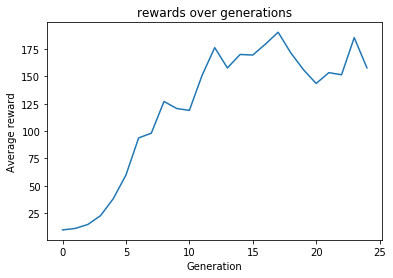

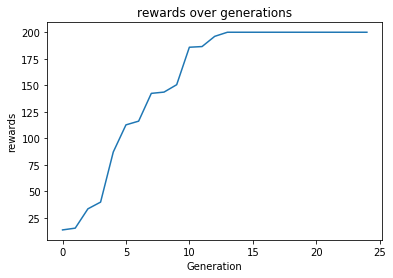

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import gym
import time

GAME = 'CartPole-v0'
MAX_STEPS = 1000
env = gym.make(GAME)
in_dimen = env.observation_space.shape[0]
out_dimen = env.action_space.shape[0]
dim=[in_dimen, 6, out_dimen]
N_GENERATION=25
N_pop =20
selection=2
mut_rate=0.01

class NN:
    def __init__(self,dim):
        self.fitness=0.0
        self.dict={}
        for i in range(len(dim)-1):
            self.dict["W"+str(i+1)]=np.random.uniform(low=-1,high=1,size=(dim[i],dim[i+1]))
            self.dict["b"+str(i+1)]=np.random.uniform(low=-1,high=1,size=(dim[i+1]))

def sigmoid(z):
    s = 1./(1+np.exp(-z))
    return s
def propagate(NN,obs): 
    tmp=obs
    for i in range(len(dim)-1):
        z = np.dot(NN.dict["W"+str(i+1)].T,tmp)
        tmp = z+NN.dict["b"+str(i+1)]
        if i ==0 :           
            tmp=np.maximum(0,tmp)
        tmp = sigmoid(tmp)
    return  np.argmax(tmp);
def crossover(NN1,NN2):
    NNN=NN(dim)    
    #loop over the weights
    for c in range(len(dim)-1):
        w1=NN1.dict["W"+str(c+1)]
        w2=NN1.dict["W"+str(c+1)]
        w=np.zeros_like(w1)
        for i in range (w1.shape[0]):
            for j in range (w1.shape [1]):
                if random.random() > 0.5 :
                    w[i][j]=w1[i][j]
                else:
                    w[i][j]=w2[i][j]
        NNN.dict["W"+str(c+1)]=w
        b1=NN1.dict["b"+str(c+1)]
        b2=NN2.dict["b"+str(c+1)]
        b = np.zeros_like(b1)
        for i in range(b1.shape[0]):
            if random.random() > 0.5:
                b[i]=b1[i]
            else:
                b[i]=b2[i]
        NNN.dict["b"+str(c+1)]=b
    return NNN

def mutation(NN,rate=0.01):
    
    for c in range(len(dim)-1):
        w=NN.dict["W"+str(c+1)]
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                if random.random() < rate:
                    NN.dict["W"+str(c+1)][i][j]=np.random.uniform(low=-1,high=1)
        b=NN.dict["b"+str(c+1)]
        for i in range(b.shape[0]):
            if random.random() < rate :
                NN.dict["b"+str(c+1)][i]=np.random.uniform(low=-1,high=1)
    return NN

def fitness(env,policy,n_episodes=100) :
    total_rewards = 0.0
    for i in range(n_episodes):
        total_rewards += run(env, policy)
    return total_rewards/n_episodes

def run(env, policy, episode_len=100):
    
    total_reward = 0
    obs = env.reset()
    for t in range(MAX_STEPS):
        #env.render()
        action = propagate(policy,obs)
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward ;

best_NN=None
best_NN_fitness=-100000
visual=[]
population=[NN(dim) for _ in range(N_pop)]
avg=np.zeros(N_GENERATION)
best = np.zeros(N_GENERATION)
    #loop over generations , it could also be a while loop until we obtain for example a score of 0.9
start=time.time()
for i in range(N_GENERATION):
    #vector as the size of N_POPS contains the score of each pop
    rewards=np.zeros(N_pop)
    #calculate the score of each pop
    for j in range(N_pop):
        rewards[j]=fitness(env,population[j])
    print('For Generation',i+1,'maximum :',max(rewards)) 
    #sort of the rewards in order to select the best pops
    best_scores=np.argsort(rewards)
    if i % 50 == 0 :
        visual.append(population[np.argmax(rewards)])
    #selection of best pops
    best[i] = max(rewards)
    
    if best[i]>best_NN_fitness:
        best_NN_fitness=best[i]
        best_NN=population[np.argmax(rewards)]
    avg[i] = np.mean(rewards)
    best_scores=best_scores[-selection:]
    best_pops=[]
    for c in range(selection):
        best_pops.append(population[best_scores[c]])
        #crossover the best ones randomly and ensure the same size of the pop
    new_pops=[]
    for j in range(N_pop):
        new_pops.append(crossover(best_pops[np.random.choice(len(best_scores))],best_pops[np.random.choice(len(best_scores))]))
            
    #Mutation over the newly born pops
    all=[]
    
    for c in range(N_pop):
        all.append (mutation(new_pops[c],mut_rate))
    population=new_pops

end=time.time()
print('Running time : ',(end-start))

plt.plot(avg)
plt.xlabel('Generation')
plt.ylabel('Average reward')
plt.title('rewards over generations')
plt.show()
plt.plot(best)
plt.xlabel('Generation')
plt.ylabel('rewards')
plt.title('rewards over generations')
plt.show()

        

In [9]:
lim=np.zeros(25)+200
fig, ax = plt.subplots()

l1, = ax.plot(avg)
l2, = ax.plot(best,)
l3=ax.plot(lim,'o')

ax.legend((l1, l2), ('Average reward of population', 'Best Policy reward'), loc='upper left', shadow=False)
ax.set_xlabel('Generation')
ax.set_ylabel('Reward')
ax.set_title('Cartpole_v0')
plt.gcf().set_size_inches(15, 10)
plt.savefig('Cartpole_25gen.png')
plt.show()